# Training Data Creator

In [17]:
import os
import numpy as np
import pandas as pd
import librosa
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
DATA_DIRECTORY = os.path.join("..", "data")
TRAINING_DATA_DIRECTORY = os.path.join(DATA_DIRECTORY, "training_samples")
TRAINING_DATA_FILENAME = "training_data_summary"

In [19]:
def load_data(file_path):
    print("Loading audio file:", file_path)
    audio, sample_rate = librosa.load(file_path, sr=None)
    print("Audio loaded. Sample rate:", sample_rate, "Length:", len(audio))
    return audio, sample_rate


def analyze_voice(audio, sample_rate):
    try:
        # print("Extracting MFCCs...")
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

        # print("Extracting Chroma...")
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)

        # print("Extracting Mel Spectrogram...")
        mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)  # Corrected line

        # print("Extracting Spectral Contrast...")
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)

        # print("Extracting Tonnetz...")
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate)

        return {
                    "length": len(audio),
                    "mfccs": np.mean(mfccs) if mfccs.ndim > 1 else np.mean(mfccs),
                    "chroma": np.mean(chroma) if chroma.ndim > 1 else np.mean(chroma),
                    "mel": np.mean(mel) if mel.ndim > 1 else np.mean(mel),
                    "contrast": np.mean(contrast) if contrast.ndim > 1 else np.mean(contrast),
                    "tonnetz": np.mean(tonnetz) if tonnetz.ndim > 1 else np.mean(tonnetz)
                }
    
    except Exception as e:
        print(f"Error analyzing audio data: {e}")

In [20]:
df = pd.DataFrame(columns=["name", "number", "length", "sample_rate", 
                           "mfccs", "chroma", "mel", "contrast", "tonnetz"])

for subdirectory in os.listdir(TRAINING_DATA_DIRECTORY):
    subdirectory_path = os.path.join(TRAINING_DATA_DIRECTORY, subdirectory)
    print(f"Iterating files in {subdirectory_path}")

    if os.path.isdir(subdirectory_path):
        for filename in os.listdir(subdirectory_path):
            if filename.lower().endswith(".wav"):
                file_path = os.path.join(subdirectory_path, filename)
                try:
                    name, number_with_extension = filename.split("+")
                    number = int(number_with_extension.split('.')[0])

                    print(f"Processing {filename}...")
                    audio, sample_rate = load_data(file_path)
                    voice_data = analyze_voice(audio, sample_rate)

                    temp_df = pd.DataFrame({
                        "name": [name.lower()],
                        "number": [number],
                        "length": [voice_data["length"]],
                        "sample_rate": [sample_rate],
                        "mfccs": [voice_data["mfccs"]],  # Compute mean across the appropriate axis
                        "chroma": [voice_data["chroma"]],
                        "mel": [voice_data["mel"]],
                        "contrast": [voice_data["contrast"]],
                        "tonnetz": [voice_data["tonnetz"]],
                    })

                    df = pd.concat([df, temp_df], ignore_index=True)

                except Exception as e:
                    print(f"Error processing {filename} in {subdirectory}: {e}")

Iterating files in ..\data\training_samples\andrew_tate_voice
Processing andrew_tate+1.wav...
Loading audio file: ..\data\training_samples\andrew_tate_voice\andrew_tate+1.wav
Audio loaded. Sample rate: 32000 Length: 252633
Processing andrew_tate+10.wav...
Loading audio file: ..\data\training_samples\andrew_tate_voice\andrew_tate+10.wav
Audio loaded. Sample rate: 32000 Length: 229227
Processing andrew_tate+11.wav...
Loading audio file: ..\data\training_samples\andrew_tate_voice\andrew_tate+11.wav
Audio loaded. Sample rate: 32000 Length: 328423
Processing andrew_tate+12.wav...
Loading audio file: ..\data\training_samples\andrew_tate_voice\andrew_tate+12.wav
Audio loaded. Sample rate: 32000 Length: 335110
Processing andrew_tate+13.wav...
Loading audio file: ..\data\training_samples\andrew_tate_voice\andrew_tate+13.wav
Audio loaded. Sample rate: 32000 Length: 260806
Processing andrew_tate+14.wav...
Loading audio file: ..\data\training_samples\andrew_tate_voice\andrew_tate+14.wav
Audio load

In [27]:
print(voice_data["mfccs"])

-9.338684


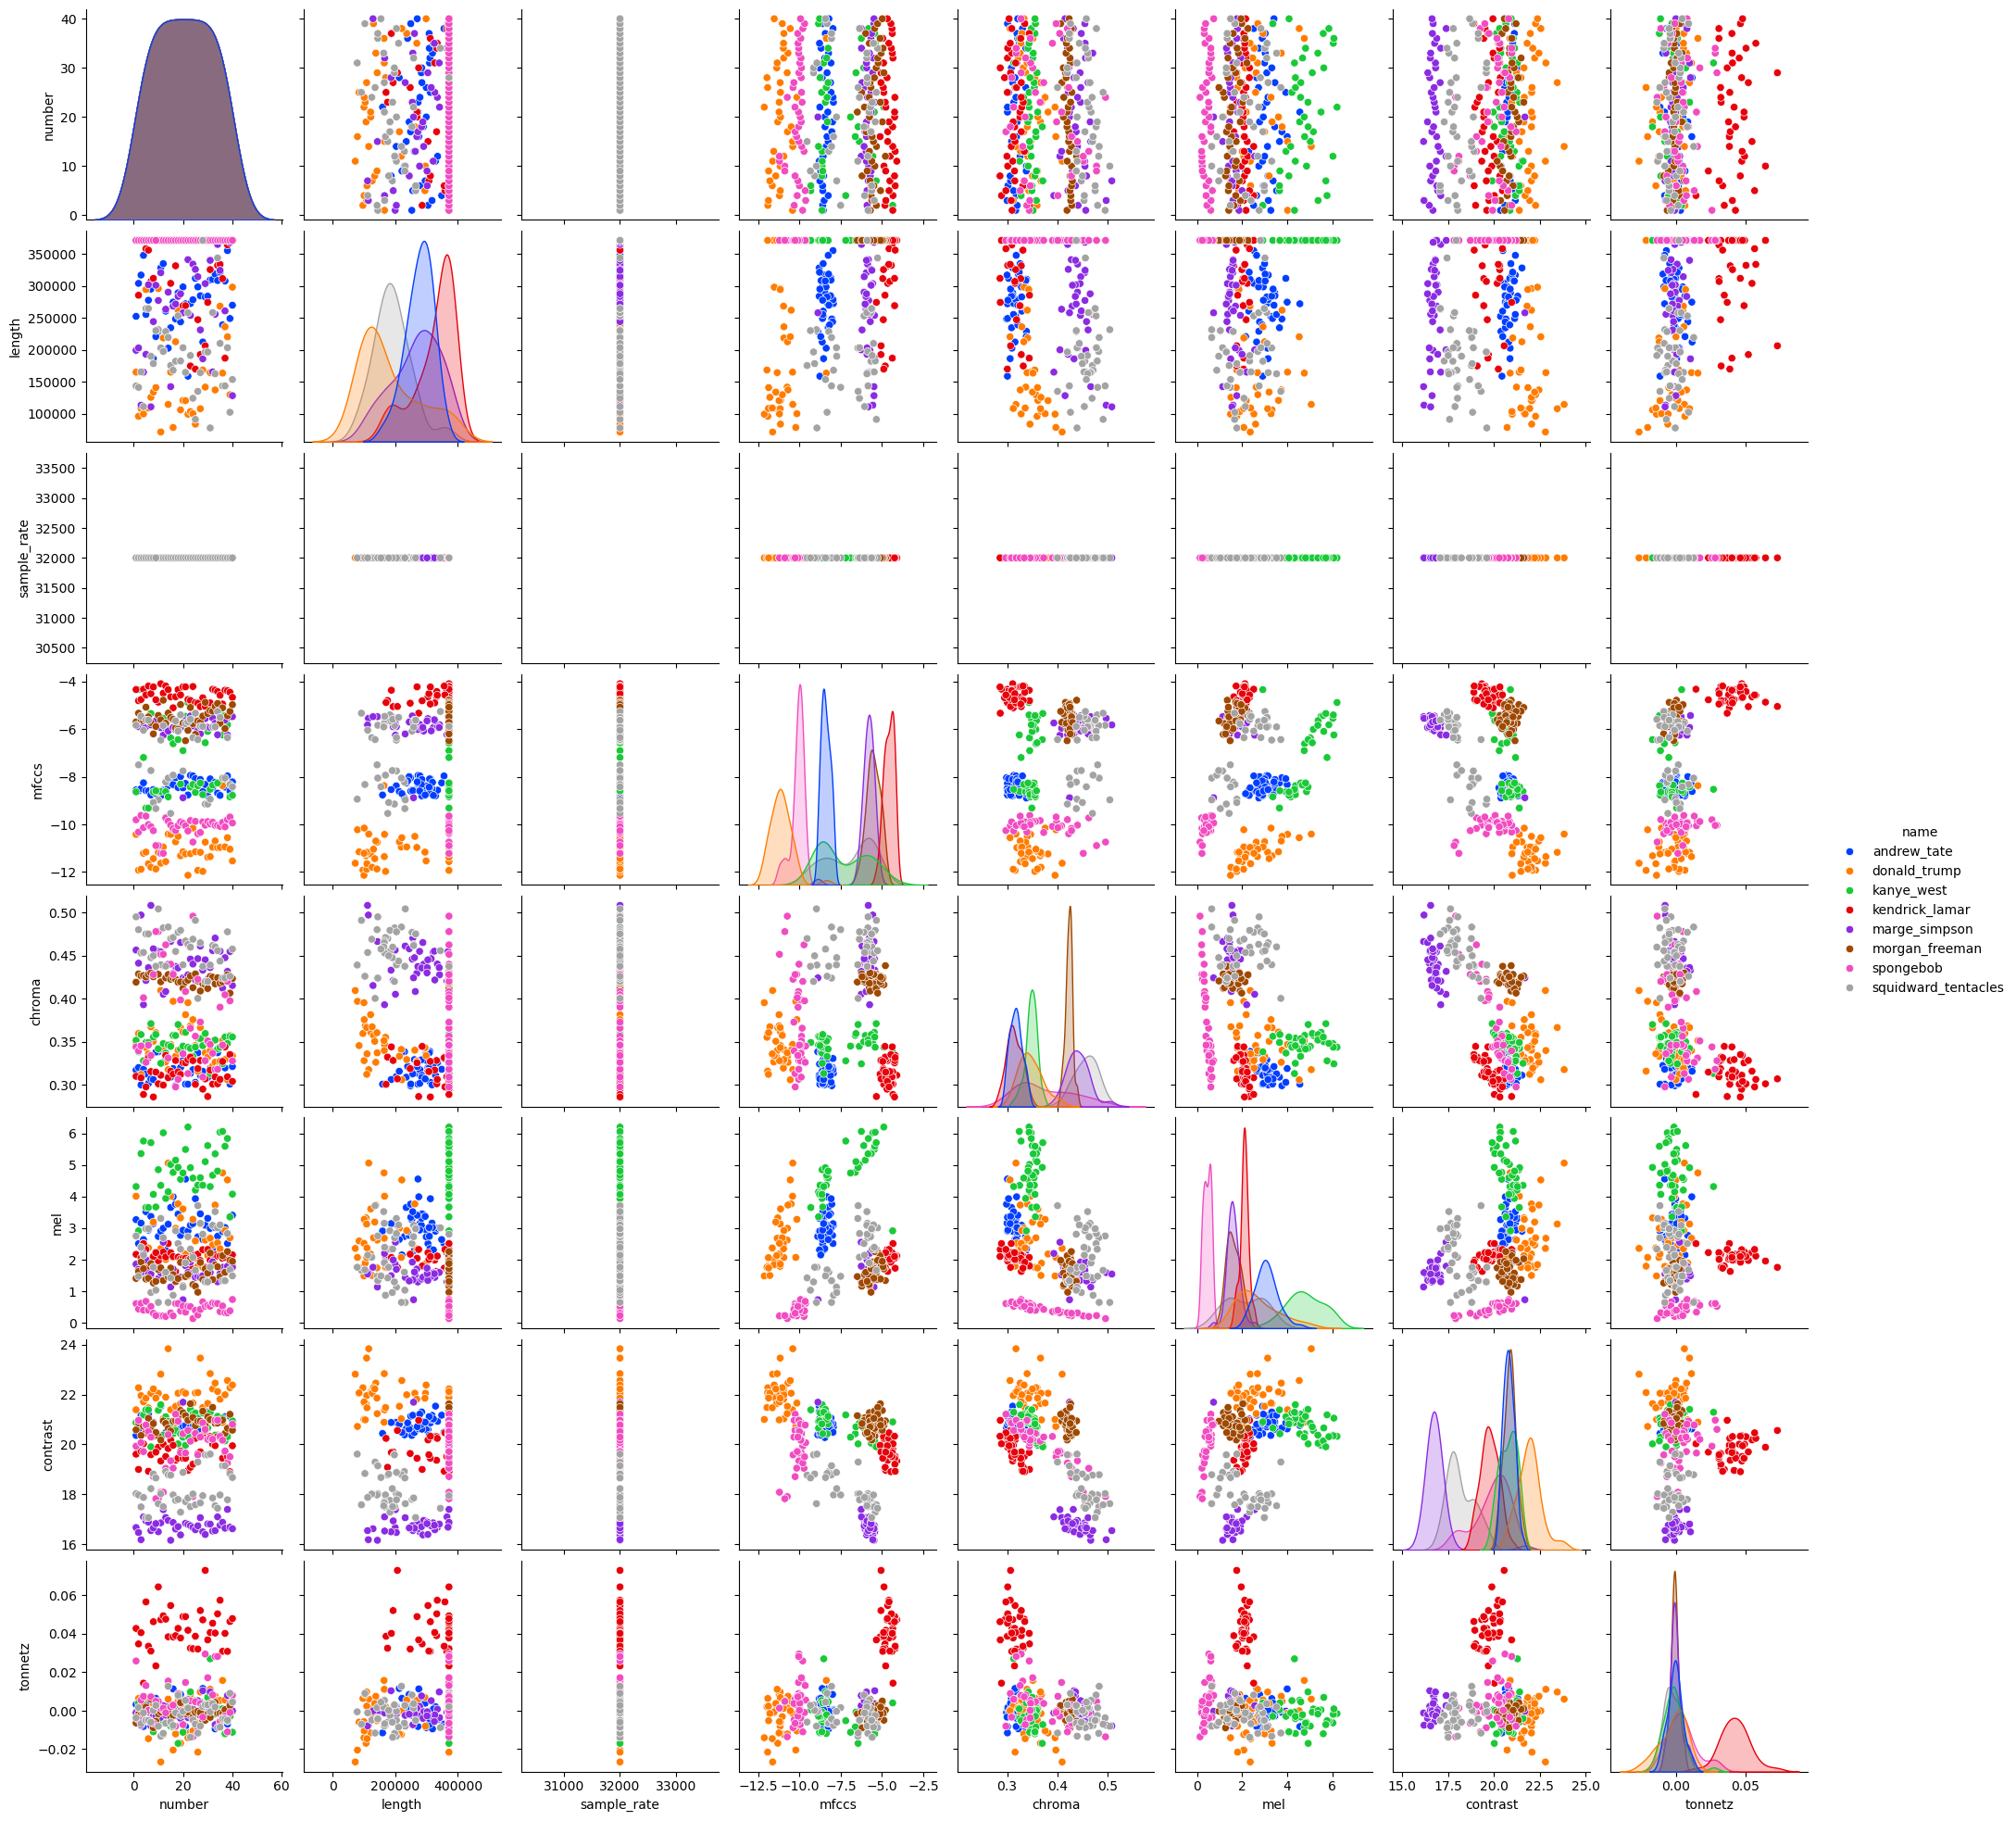

In [21]:
# Create a pairplot
sns.pairplot(df, hue='name', palette='bright')

# Show the plot
plt.show()

In [22]:
normalized_df = df.copy()

# Calculate max_values for each feature
max_values = {
    'mfccs': df['mfccs'].min(),
    'chroma': df['chroma'].max(),
    'mel': df['mel'].max(),
    'contrast': df['contrast'].max(),
    'tonnetz': df['tonnetz'].max()
}

# Normalize each column directly
normalized_df['mfccs'] = df['mfccs'] / max_values['mfccs']
normalized_df['chroma'] = df['chroma'] / max_values['chroma']
normalized_df['mel'] = df['mel'] / max_values['mel']
normalized_df['contrast'] = df['contrast'] / max_values['contrast']
normalized_df['tonnetz'] = df['tonnetz'] / max_values['tonnetz']

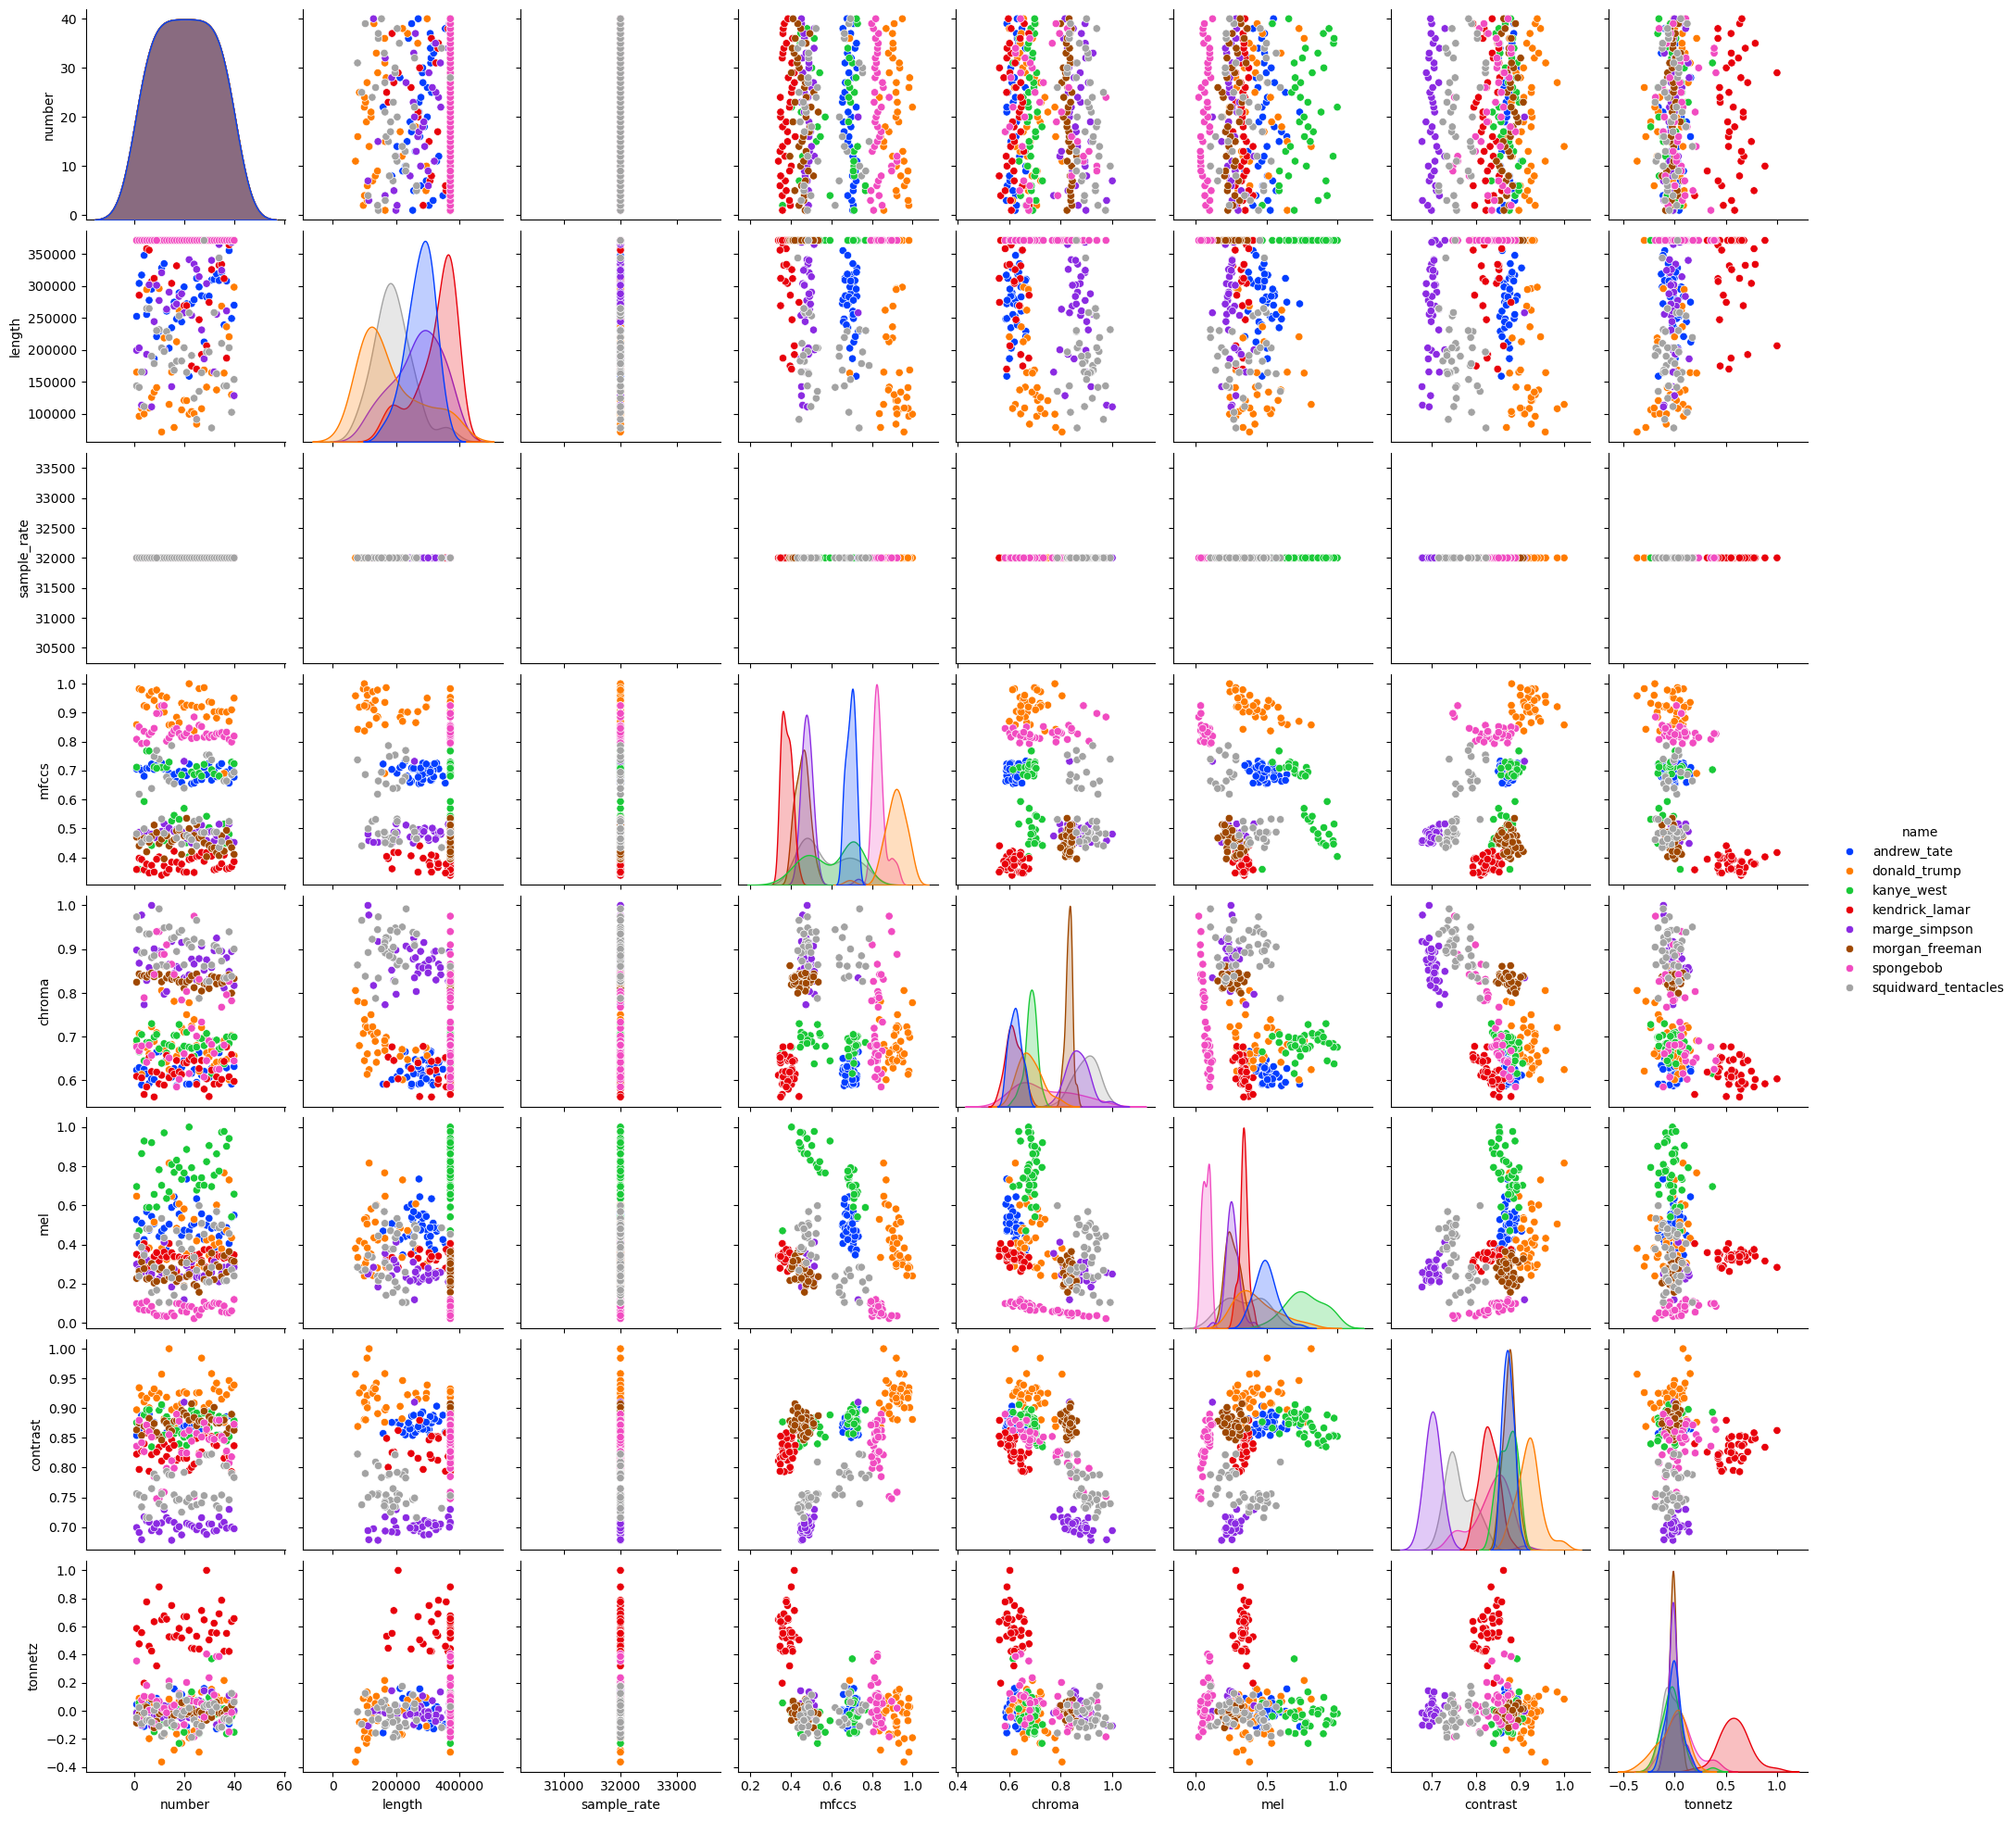

In [23]:
# Create a pairplot
sns.pairplot(normalized_df, hue='name', palette='bright')

# Show the plot
plt.show()

In [24]:
csv_file_path = os.path.join(DATA_DIRECTORY, f'{TRAINING_DATA_FILENAME}.csv')
df.to_csv(csv_file_path, index=False)
print(f"Data saved to {csv_file_path}")

Data saved to ..\data\training_data_summary.csv


In [25]:
normalized_csv_file_path = os.path.join(DATA_DIRECTORY, 'normalized_training_data_summary.csv')
normalized_df.to_csv(normalized_csv_file_path, index=False)
print(f"Data saved to {normalized_csv_file_path}")

Data saved to ..\data\normalized_training_data_summary.csv


In [26]:
pkl_file_path = os.path.join(DATA_DIRECTORY, f'{TRAINING_DATA_FILENAME}.pkl')
df.to_pickle(pkl_file_path)
print(f"Data saved to {pkl_file_path}")

Data saved to ..\data\training_data_summary.pkl
